In [175]:
import pandas as pd
import numpy as np

df = pd.DataFrame([['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware'],[4779736,710231,6392017,2915918,37253956,5029196,3574097,897934],
                  [5.7,5.6,4.7,5.6,4.4,2.8,2.4,5.8],['AL','AK','AZ','AR','CA','CO','CT','DE']]).T
df.columns=['State','Population','Murder Rate','Abbreviation']
df.index=['1','2','3','4','5','6','7','8']

df


,State,Population,Murder Rate,Abbreviation
1,Alabama,4779736,5.7,AL
2,Alaska,710231,5.6,AK
3,Arizona,6392017,4.7,AZ
4,Arkansas,2915918,5.6,AR
5,California,37253956,4.4,CA
6,Colorado,5029196,2.8,CO
7,Connecticut,3574097,2.4,CT
8,Delaware,897934,5.8,DE


In [176]:
from scipy import stats

mean = df['Population'].mean()
median = df['Population'].median()
trimmed_mean = stats.trim_mean(df['Population'], 0.1)

print(f"Mean of Population = {mean}")
print(f"Median of Population = {median}")
print(f"Trimmed Mean of Population = {trimmed_mean}")

Mean of Population = 7694135.625
Median of Population = 4176916.5
Trimmed Mean of Population = 7694135.625


# **Weighted Mean:**

1. Average (or Arithmetic Mean)

This is the regular mean — what we usually call “average.”

Formula:

Mean
=
Sum of all values
Number of values
Mean=
Number of values
Sum of all values
	​


Example:
If test scores are [80, 90, 70],
then mean = (80 + 90 + 70) / 3 = 80.

 2. Weighted Mean

Used when some values have more importance (weight) than others.
Each data point contributes according to its weight.

<br>

Weighted Mean = summation of (xi * wi) / summ of all wi


<br>

xi = each value

wi = its weight

<br>

If you wanted a weighted mean, for example “murder rate weighted by population,” you’d do:

**weighted_mean = (df['Murder Rate'] * df['Population']).sum() / df['Population'].sum()**


In [177]:
weighted_mean = np.average(df['Murder Rate'],weights = df['Population'])
print(f"Weighted mean is {weighted_mean}")

Weighted mean is 4.376359279149048


In [178]:
df

,State,Population,Murder Rate,Abbreviation
1,Alabama,4779736,5.7,AL
2,Alaska,710231,5.6,AK
3,Arizona,6392017,4.7,AZ
4,Arkansas,2915918,5.6,AR
5,California,37253956,4.4,CA
6,Colorado,5029196,2.8,CO
7,Connecticut,3574097,2.4,CT
8,Delaware,897934,5.8,DE


# **INTERQUARTILE_RANGE:**

Difference of 75th and 25th Percentile

In [179]:
sorted_df = df.sort_values(by=['Population'],ascending=True)
sorted_df

,State,Population,Murder Rate,Abbreviation
2,Alaska,710231,5.6,AK
8,Delaware,897934,5.8,DE
4,Arkansas,2915918,5.6,AR
7,Connecticut,3574097,2.4,CT
1,Alabama,4779736,5.7,AL
6,Colorado,5029196,2.8,CO
3,Arizona,6392017,4.7,AZ
5,California,37253956,4.4,CA


In [180]:
precentile_one = np.percentile(sorted_df['Population'],25)
percentile_two = np.percentile(sorted_df['Population'],75)

interquartile_range = percentile_two - precentile_one

interquartile_range

np.float64(2958479.25)

## **OR:**

Shortcut method by using **"scipy.stats"** package!!

<br>

**No need for sorting the data**

In [181]:
from scipy.stats import iqr

IQR = iqr(df['Population'])
IQR

np.float64(2958479.25)

## **Visualizing Outliers,IQR through Box-plot**

In [182]:
quartile_range=df['Population'].quantile([0.25,0.5,0.75])
quartile_range

,Population
0.25,2411422.0
0.50,4176916.5
0.75,5369901.25


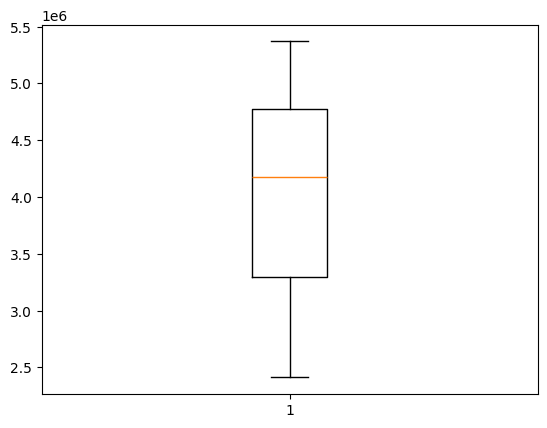

In [183]:
import matplotlib.pyplot as plt

plt.boxplot(quartile_range)
plt.show()

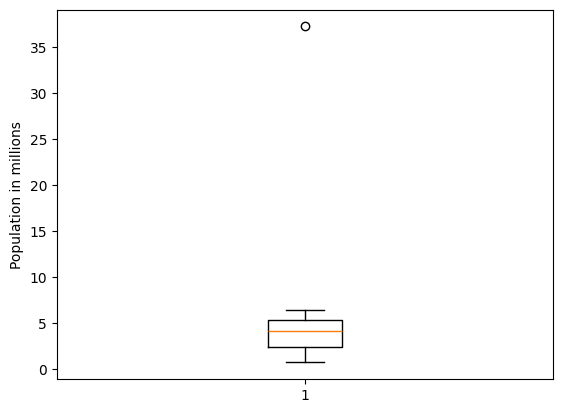

In [184]:
plt.boxplot(df['Population']/1000000)
plt.ylabel("Population in millions")
plt.show()

### **Here the queartile-1: 2(25%) ,quartile-2: 4.5 and quartile-3: 6(75%)**

In [185]:
df_by_me = pd.read_csv("/content/random_1.csv")
df_by_me

,Unnamed: 0,T,CTL,FTR,VZ,LVLT
0,T,1.000,0.475,0.328,0.678,0.279
1,CLT,0.475,1.000,0.420,0.417,0.287
2,FTR,0.328,0.420,1.000,0.287,0.260
3,VZ,0.678,0.417,0.287,1.000,0.242
4,LVLT,0.279,0.287,0.260,0.242,1.000


In [186]:
df

,State,Population,Murder Rate,Abbreviation
1,Alabama,4779736,5.7,AL
2,Alaska,710231,5.6,AK
3,Arizona,6392017,4.7,AZ
4,Arkansas,2915918,5.6,AR
5,California,37253956,4.4,CA
6,Colorado,5029196,2.8,CO
7,Connecticut,3574097,2.4,CT
8,Delaware,897934,5.8,DE


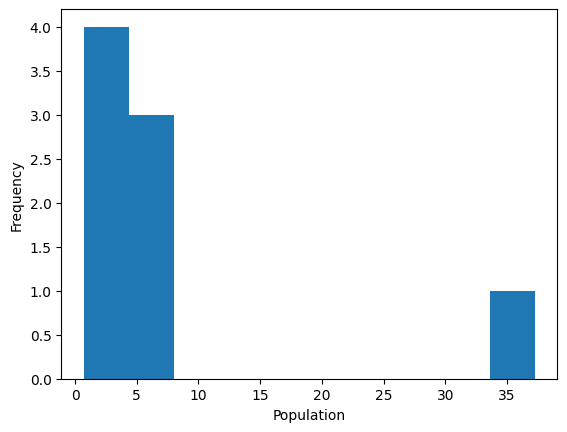

In [187]:
plt.hist((df['Population']/1000000),bins=10,histtype="bar")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

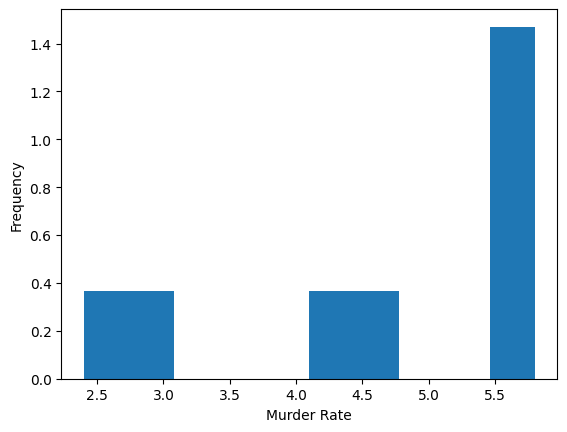

In [188]:
plt.hist((df['Murder Rate']),bins = 10,density=True,histtype="bar")
plt.xlabel("Murder Rate")
plt.ylabel("Frequency")
plt.show()

# **Barplot:**

plt.bar(categories, values,
        color='skyblue',   
        width=0.5,           
        edgecolor='black',   
        linewidth=1.2,     
        align='center',      
        label='Scores')  



| Argument    | Description                             |
| ----------- | --------------------------------------- |
| `x`         | Categories / X-axis labels              |
| `height`    | Values / heights of bars                |
| `width`     | Width of each bar (default 0.8)         |
| `color`     | Bar color (can be single color or list) |
| `edgecolor` | Border color of each bar                |
| `linewidth` | Thickness of bar edges                  |
| `align`     | `'center'` or `'edge'` alignment        |
| `label`     | For adding legend label                 |
| `alpha`     | Transparency (0.0 – 1.0)                |

<br>
<br>

x and y should be column names (as strings), not actual Series objects.

<br>

For example:

x='State' tells pandas to use the column named 'State'.

y='Murder Rate' tells pandas which values to plot.

You only use quotes (' ') around column names, not the actual df['Column'] expressions.


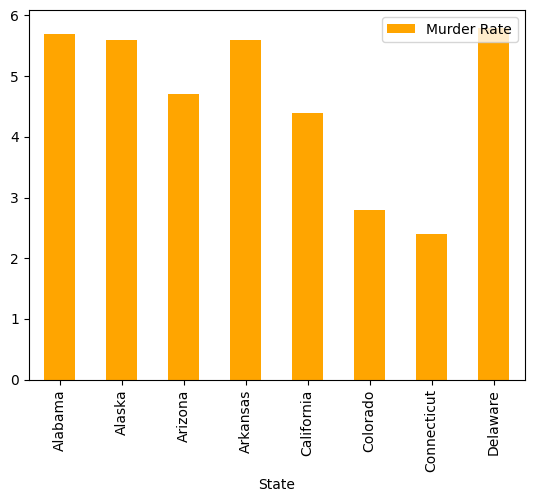

In [189]:
df.plot(kind="bar",x='State',y='Murder Rate',color="Orange")
plt.show()

In [190]:
df

,State,Population,Murder Rate,Abbreviation
1,Alabama,4779736,5.7,AL
2,Alaska,710231,5.6,AK
3,Arizona,6392017,4.7,AZ
4,Arkansas,2915918,5.6,AR
5,California,37253956,4.4,CA
6,Colorado,5029196,2.8,CO
7,Connecticut,3574097,2.4,CT
8,Delaware,897934,5.8,DE


<Axes: xlabel='Abbreviation'>

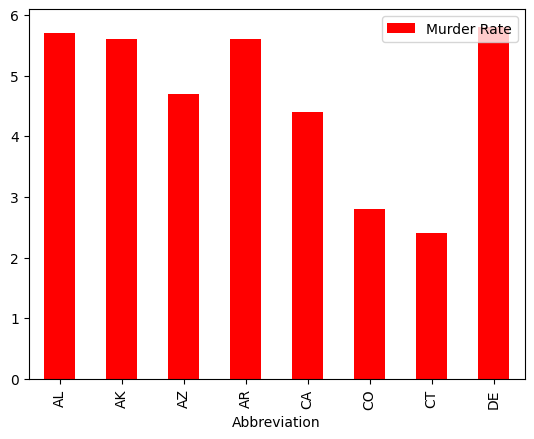

In [191]:
df.plot(kind="bar",x="Abbreviation",y="Murder Rate",color="red")

In [192]:
df2 = pd.read_csv("/content/random_2.csv")
df2

,Unnamed: 0,T,CTL,FTR,VZ,LVLT
0,T,1.000,0.475,0.328,0.678,0.279
1,CLT,0.475,1.000,0.420,0.417,0.287
2,FTR,0.328,0.420,1.000,0.287,0.260
3,VZ,0.678,0.417,0.287,1.000,0.242
4,LVLT,0.279,0.287,0.260,0.242,1.000


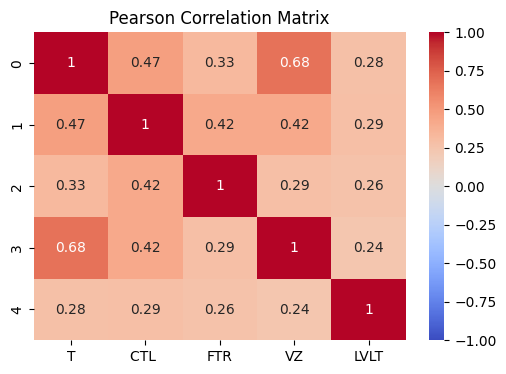

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

df2_copy = df2.drop(columns=["Unnamed: 0"])

plt.figure(figsize=(6, 4))
sns.heatmap(df2_copy, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pearson Correlation Matrix")
plt.show()



# **HEre why did I drop a column?**

Your “T”, “CTL”, “FTR”, etc. in the first column are probably string labels, not part of the numeric matrix.

Once you drop that column, the heatmap will plot fine.

In [194]:
df2

,Unnamed: 0,T,CTL,FTR,VZ,LVLT
0,T,1.000,0.475,0.328,0.678,0.279
1,CLT,0.475,1.000,0.420,0.417,0.287
2,FTR,0.328,0.420,1.000,0.287,0.260
3,VZ,0.678,0.417,0.287,1.000,0.242
4,LVLT,0.279,0.287,0.260,0.242,1.000


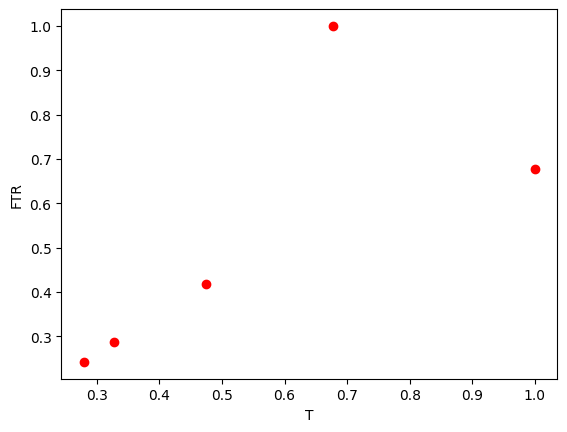

In [195]:
plt.scatter(x=df2['T'],y=df2['VZ'],color='Red')
plt.xlabel("T")
plt.ylabel("FTR")
plt.show()

# **Violin Plot**

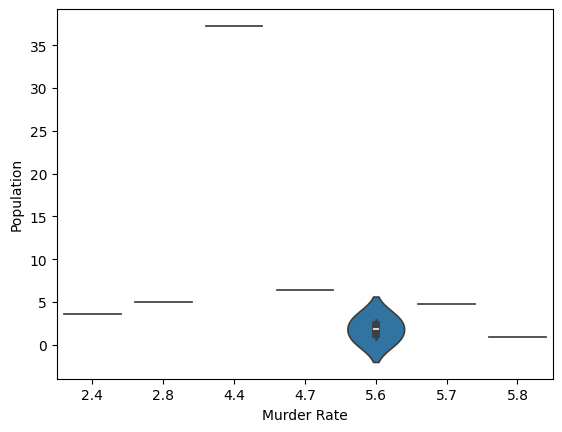

In [136]:
import seaborn as sns

sns.violinplot(x=df['Murder Rate'],y=df['Population']/1000000)
plt.show()

In [137]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("heptapod/titanic")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'titanic' dataset.
Path to dataset files: /kaggle/input/titanic


In [138]:
df = pd.read_csv("/kaggle/input/titanic/train_and_test2.csv")
df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


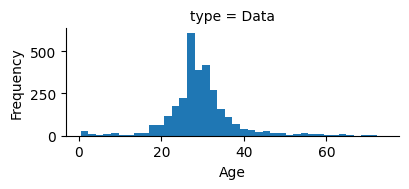

In [139]:
import seaborn as sns

sample = pd.DataFrame({'Estimate':df['Age'].sample(1000),
'type':'Data'})

sample_mean05 = pd.DataFrame({'Estimate': [df['Age'].sample(5).mean() for _ in range(1000)],
                              'type': 'Data'})

sample_mean20 = pd.DataFrame({'Estimate': [df['Age'].sample(20).mean() for _ in range(1000)],
                              'type': 'Data'})

results = pd.concat([sample, sample_mean05, sample_mean20])

g = sns.FacetGrid(results, col='type',col_wrap=1,height=2,aspect=2)
g.map(plt.hist,'Estimate',bins=40)
g.set_axis_labels("Age", "Frequency")

In [140]:
import seaborn as sns

df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [141]:
df.cov(numeric_only=True)

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


In [142]:
df.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

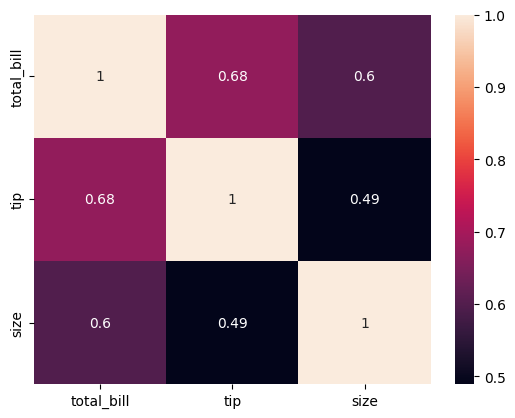

In [143]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: >

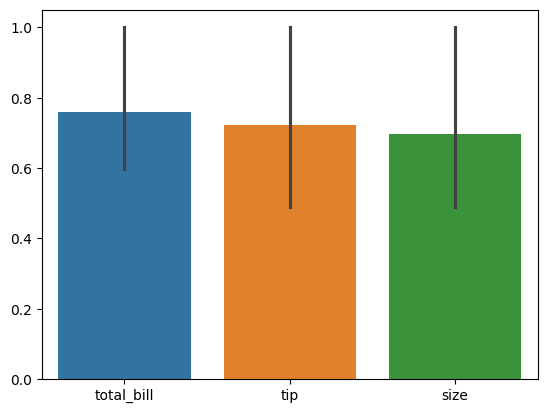

In [144]:
sns.barplot(df.corr(numeric_only=True))

# **PROBABILITY DISTRIBUTION TEST**

<br>

## **Probability Distributions by PMF vs PDF:**

| Category                           | Uses                         | Distributions                                                                                                                          |
| ---------------------------------- | ---------------------------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| **PMF** (Discrete distributions)   | Probability Mass Function    | - Bernoulli<br>- Binomial<br>- Poisson<br>- Discrete Uniform                 |
| **PDF** (Continuous distributions) | Probability Density Function | - Continuous Uniform<br>- Normal (Gaussian)<br>- Exponential<br>- Chi-Square<br>- Student’s t<br>- F-Distribution |


In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# **HERE wherever 'mu' and 'sigma' used assume that 'mu' is Mean and 'sigma' is Standard Deviation value.**

# **NORMAL DISTRIBUTION/Gaussian DISTRIBUTION:**
majority of datas are clustered around mean.



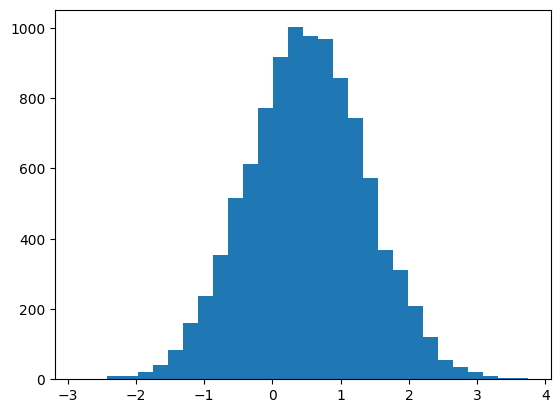

In [146]:
mu = 0.5
sigma = 0.86
data = np.random.normal(mu,sigma,10000)
plt.hist(data,bins=30)
plt.show()

<Axes: ylabel='Density'>

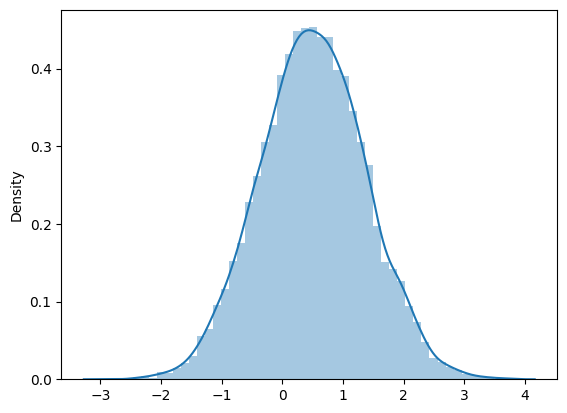

In [147]:
sns.distplot(data)

# **UNIFORM DISTRIBUTION:**

All the outcomes has equal probability to occur in a range.

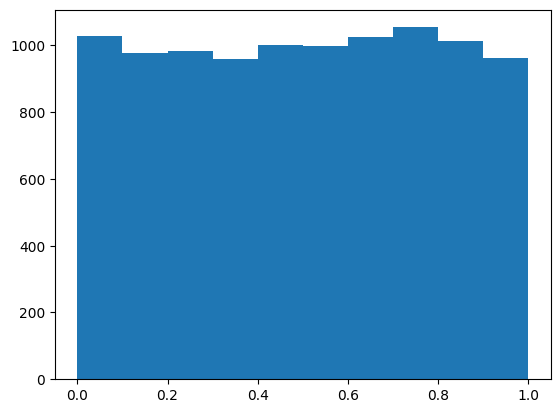

In [148]:
u = np.random.uniform(0,1,10000)
plt.hist(u)
plt.show()

<Axes: ylabel='Density'>

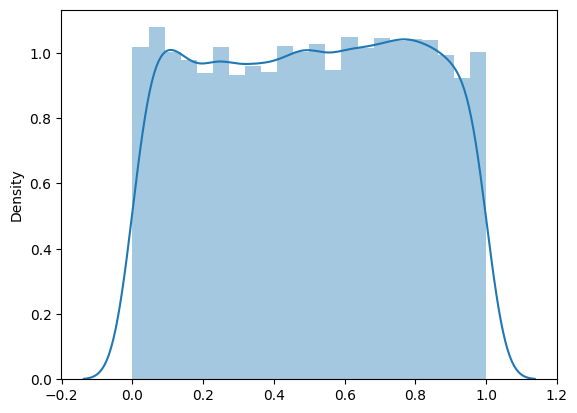

In [149]:
sns.distplot(u)

# **Log Normal Distribution:**

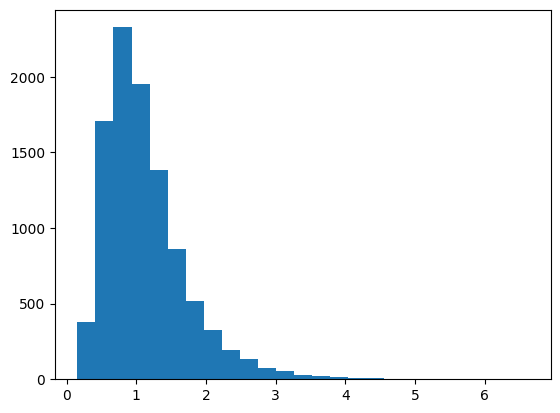


Size of 'log_n' is : 10000


In [150]:
log_n = np.random.lognormal(mean=0,sigma=0.5,size=10000)
plt.hist(log_n,bins=25)
plt.show()
print()
print(f"Size of 'log_n' is : {len(log_n)}")

<Axes: >

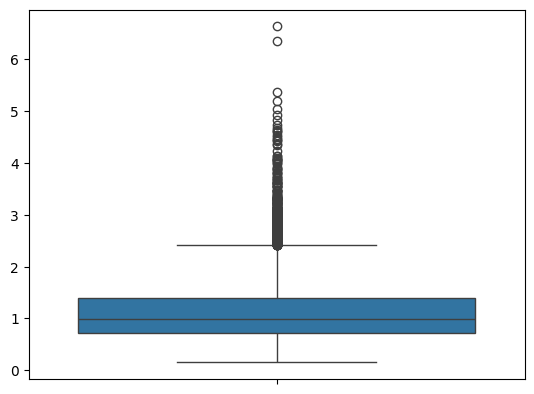

In [151]:
sns.boxplot(log_n)

# **CHI-SQUARE DISTRIBUTION:**

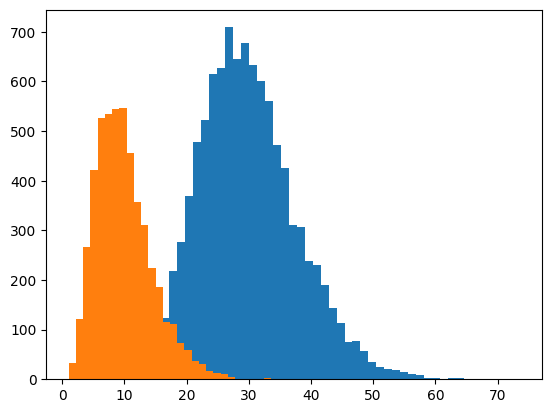

In [152]:
c = np.random.chisquare(df=30,size=10000)
d = np.random.chisquare(df=10,size=5000)
plt.hist(c,bins=50)
plt.hist(d,bins=30)
plt.show()

<Axes: ylabel='Density'>

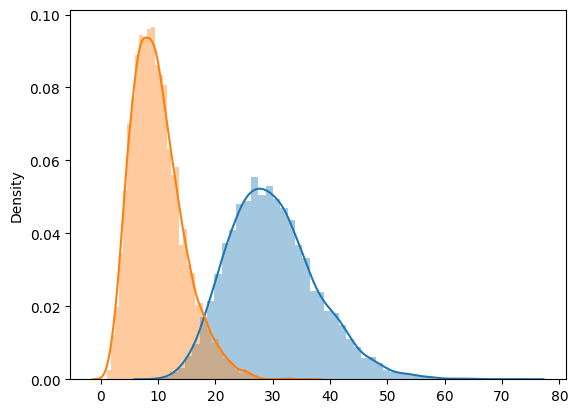

In [153]:
sns.distplot(c)
sns.distplot(d)

# **T-DISTRIBUTION:**


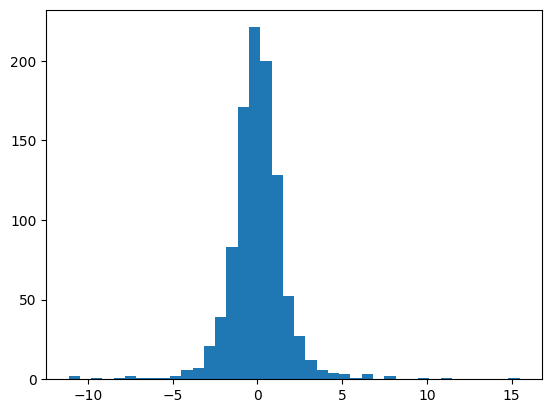

In [154]:
t = np.random.standard_t(df=3,size=1000)
plt.hist(t,bins=40)

plt.show()

<Axes: ylabel='Density'>

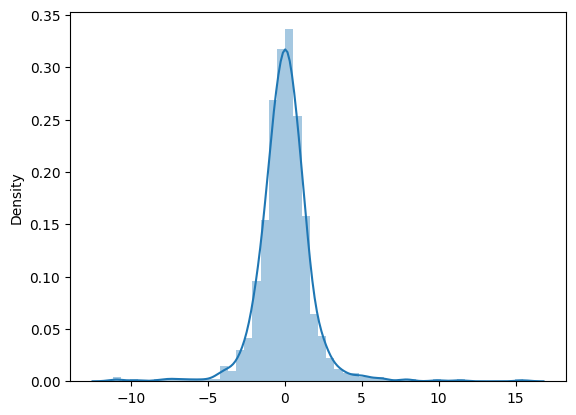

In [155]:
sns.distplot(t)

# **F-DISTRIBUTION:**

dfnum = dof in numerator
<br>
dfden = dof in denominator

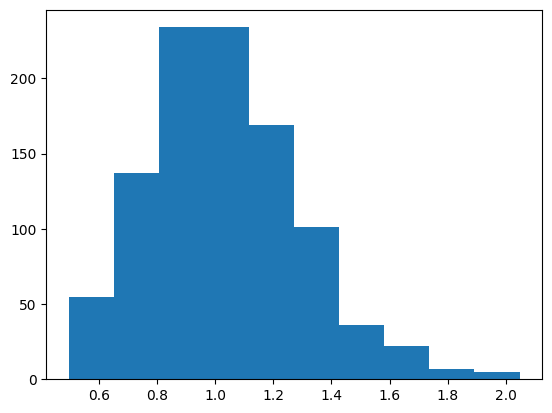

In [156]:
f = np.random.f(dfnum=50,dfden=76,size=1000)
plt.hist(f)
plt.show()

# **DISCRETE DISTRIBUTION:**

1) Bernouli
2) Binomial
3) Poisson

# **BINOMIAL DISTRIBUTION:**

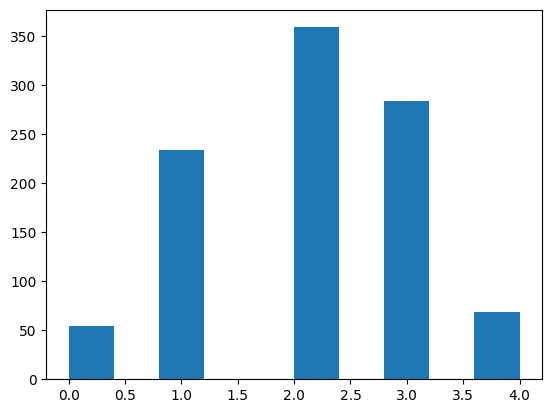

In [157]:
bn = np.random.binomial(n=4,p=0.5,size=1000)
plt.hist(bn)
plt.show()

<Axes: ylabel='Density'>

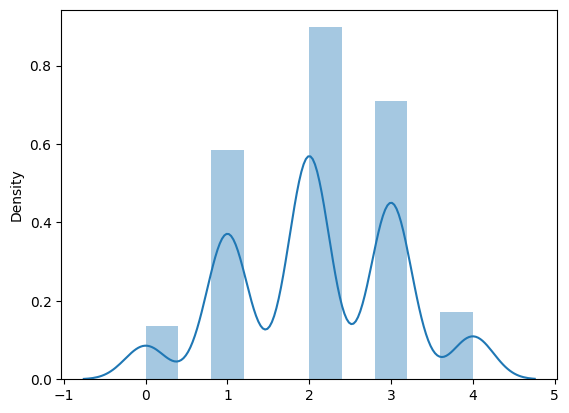

In [158]:
sns.distplot(bn)

# **BERNOULI DISTRIBUTION:**

Binomial distribution with only 1 Trial

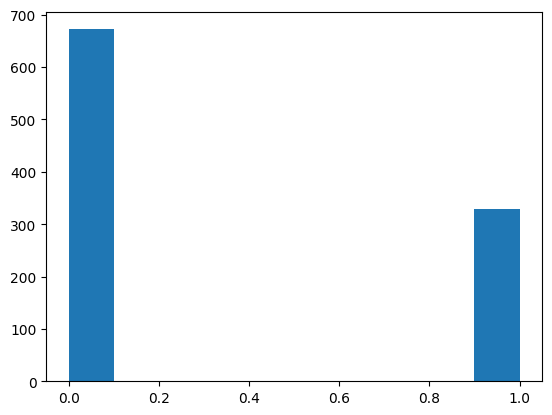

In [159]:
ber = np.random.binomial(n=1,p=0.3,size=1000)
plt.hist(ber)
plt.show()

# **POISSON DISTRIBUTION**

Here important is "Lambda"

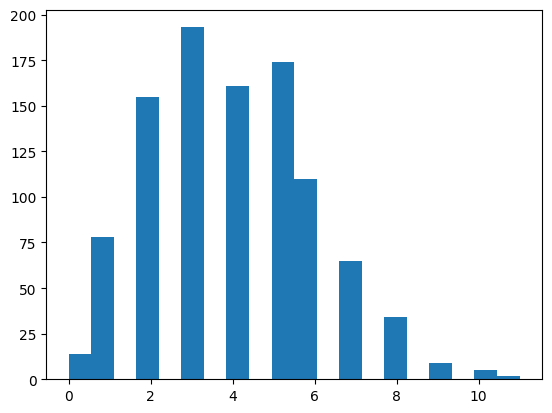

In [160]:
pois = np.random.poisson(lam=4,size=1000)
plt.hist(pois,bins=20)
plt.show()

# **DESCRIPTIVE STATS:**


In [161]:
df = sns.load_dataset('taxis')
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [162]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [164]:
df.shape

(6433, 14)

In [165]:
data = df['fare']
data.mean()

np.float64(13.091072594434944)

In [166]:
data.median()

9.5

In [167]:
import statistics as st

st.mode(data)

7.5

In [168]:
data.var()

133.4441818095617

In [169]:
data.std()

11.55180426641491

In [170]:
correlation = df.corr(numeric_only=True)
correlation

,passengers,distance,fare,tip,tolls,total
passengers,1.000000,0.009411,0.007637,0.021099,-0.002903,0.015708
distance,0.009411,1.000000,0.920108,0.452589,0.635267,0.904676
fare,0.007637,0.920108,1.000000,0.488612,0.609307,0.974358
tip,0.021099,0.452589,0.488612,1.000000,0.413619,0.646186
tolls,-0.002903,0.635267,0.609307,0.413619,1.000000,0.683142
total,0.015708,0.904676,0.974358,0.646186,0.683142,1.000000


<Axes: >

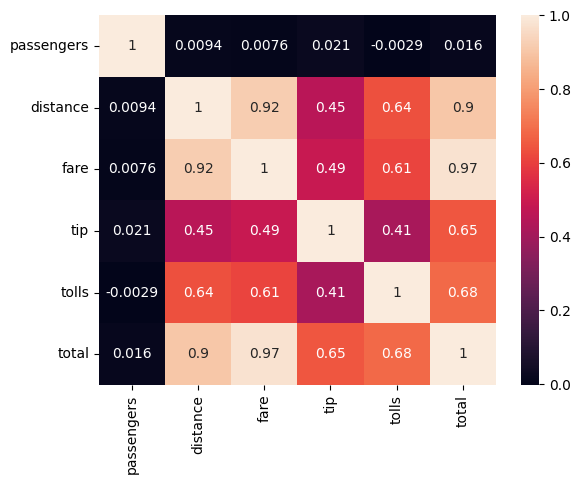

In [171]:
sns.heatmap(correlation,annot=True)

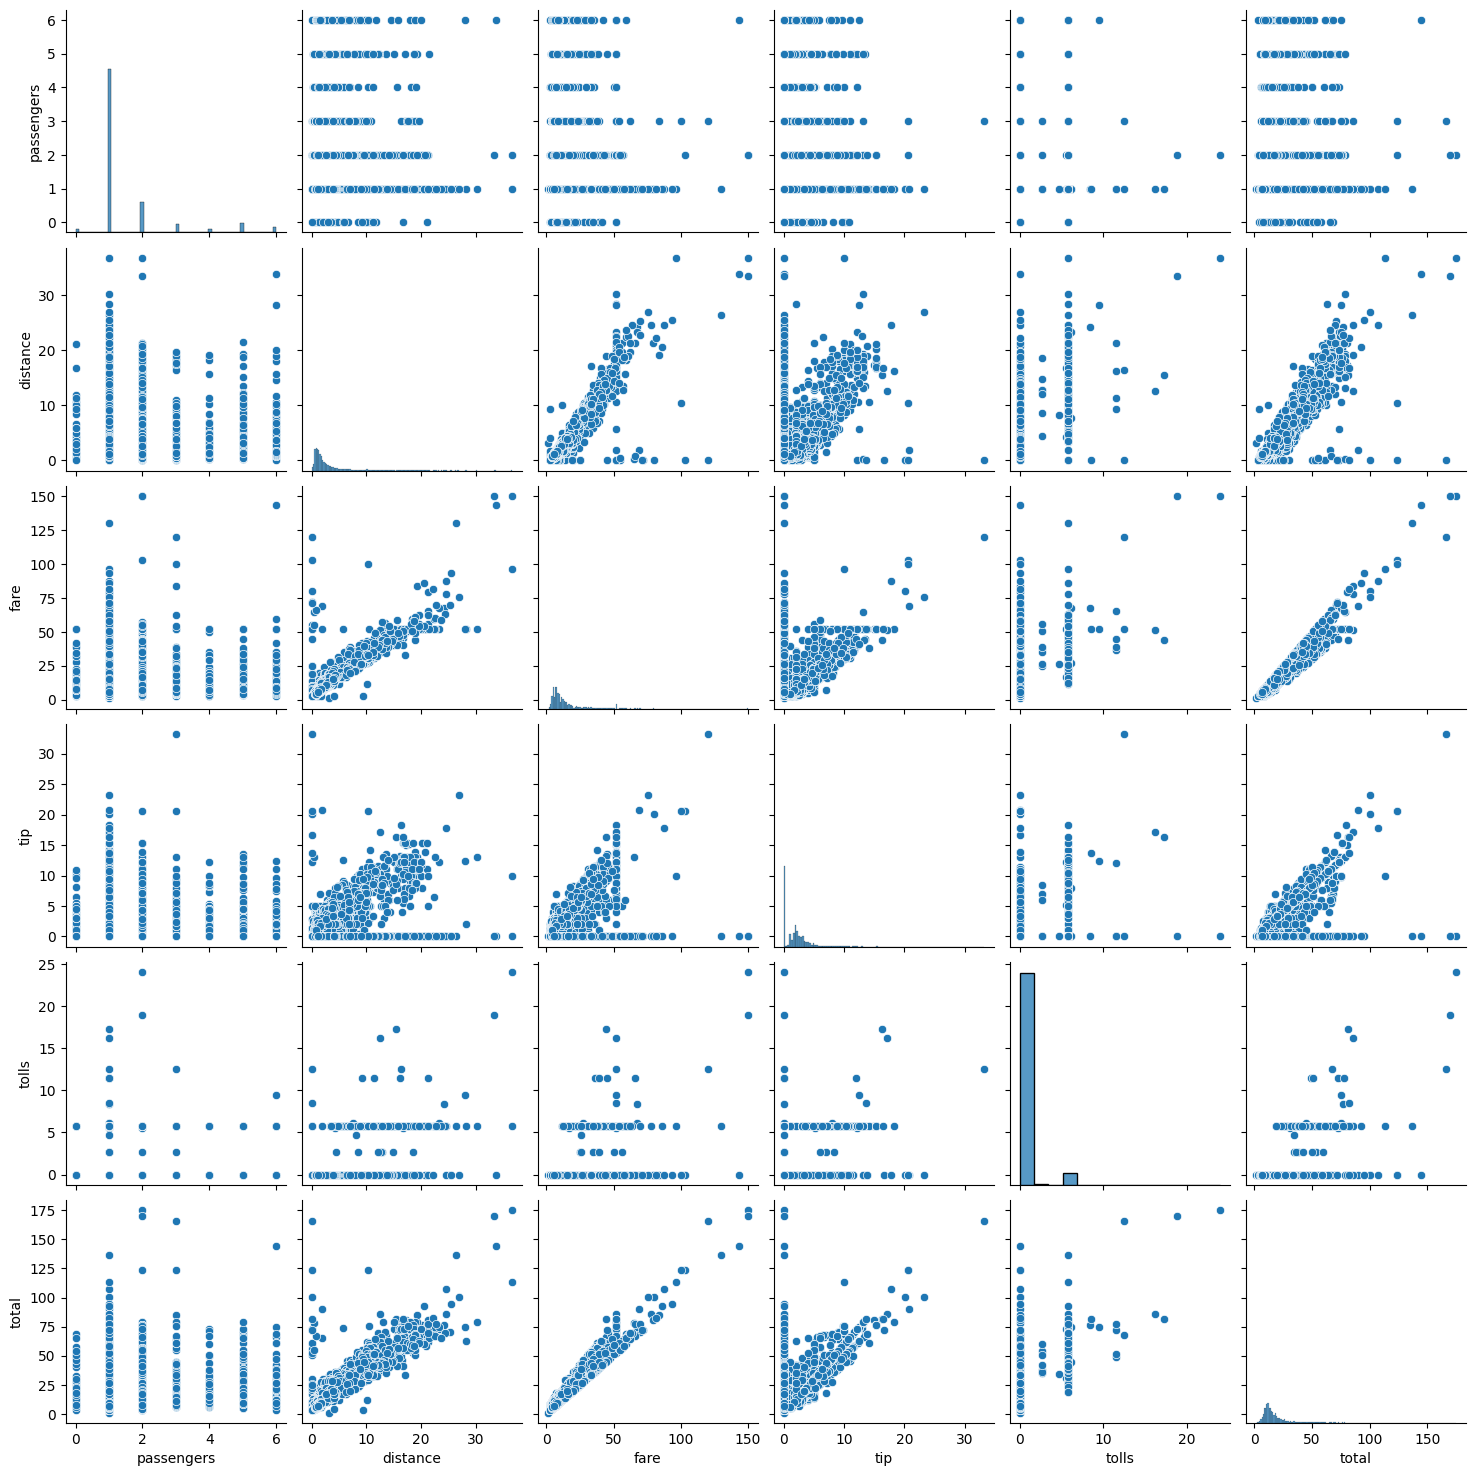

In [172]:
sns.pairplot(df)

# **Another DataFrame:**

In [173]:
df2 = sns.load_dataset('tips')
df2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [174]:
pd.crosstab(df2['sex'],df2['smoker'])

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


# **CHI_SQUARE TEST:**

In [216]:
df3 = pd.DataFrame([[2,5],[6,9],[3,3],[9,13],[16,23]],columns=['City-1','City-2'],index = ['Day-1','Day-2','Day-3','Day-4','Day-5'])
df3

,City-1,City-2
Day-1,2,5
Day-2,6,9
Day-3,3,3
Day-4,9,13
Day-5,16,23


In [217]:
print("Null hypthesis is that the Murder rate is same in both the cities")
print("Alternate hypthesis is that the Murder rate is not same in both the cities")

Null hypthesis is that the Murder rate is same in both the cities
Alternate hypthesis is that the Murder rate is not same in both the cities


In [213]:
s=0
for i in df3['City-1']:
  s += i
expected_value = s*(1/len(df3['City-1']))

chi_stat=0
for i in df3['City-2']:
  chi_stat += ((i-expected_value)**2)/expected_value

print(f"The chi-square stat value is: {chi_stat}")

The chi-square stat value is: 42.91666666666667


## **Finding Critical Value:**

In [212]:
from scipy.stats import chi2
critical = stats.chi2.ppf(q=0.05, df = 4)

print(f"The critical value is: {critical}")

The critical value is: 0.7107230213973239


In [214]:
if(chi_stat > critical):
  print("Reject Null Hypothesis")
else:
  print("Accept Null Hypothesis")

Reject Null Hypothesis


# **SHORTCUT APPROACH FOR CHI-SQUARE TEST:**

## **VERY IMPORTANT:**
In a Chi-Square Goodness-of-Fit Test:

✅ Expected frequencies must sum to the same as
<br>
✅ Observed frequencies
<br>
in df3 it was not seen so if you use df3 here it would show error

In [219]:
df4 = pd.DataFrame([[2,3],[5,9],[6,4],[7,8],[8,4]],columns=['City-1','City-2'],index = ['Day-1','Day-2','Day-3','Day-4','Day-5'])
df4

,City-1,City-2
Day-1,2,3
Day-2,5,9
Day-3,6,4
Day-4,7,8
Day-5,8,4


In [224]:
from scipy.stats import chi2
chi_square_stat,pvalue = stats.chisquare(f_obs=df4['City-2'],f_exp=df4['City-1'])
print(f"The chi-square stat value is: {chi_square_stat}")
print(f"The p-value is: {pvalue}")

The chi-square stat value is: 6.50952380952381
The p-value is: 0.16419129452475884


## **Here statistics = chi-square statistics**

Here we assumed the alpha = 0.05 / 5% which is the the significance value / estimate error

In [227]:
if(pvalue <= 0.05):
  print("Reject Null Hypothesis")
else:
  print("Accept Null Hypothesis")

Accept Null Hypothesis


# **T-Test:**

In [230]:
stats.ttest_1samp(a=df3['City-2'],popmean=df3['City-2'].mean())

TtestResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), df=np.int64(4))